In [1]:
# =============================================================================
# NOTEBOOK 01 : GÉNÉRATION DE DONNÉES SYNTHÉTIQUES
# =============================================================================
# Objectif : Créer un dataset synthétique de gestes de la main
# Classes : 0 = Poing, 1 = Paume, 2 = Victoire (V)
# =============================================================================

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Configuration pour la reproductibilité
np.random.seed(42)

print("="*70)
print("🎨 GÉNÉRATION DE DONNÉES SYNTHÉTIQUES POUR RECONNAISSANCE DE GESTES")
print("="*70)

# Vérifier que nous sommes au bon endroit
print(f"\n📍 Dossier actuel : {os.getcwd()}")

# Vérifier que data/raw existe
if not os.path.exists('data/raw'):
    print("❌ Le dossier data/raw n'existe pas !")
    print("👉 Exécutez d'abord 00_setup_project.ipynb")
    raise Exception("Structure de dossiers manquante")

print("✅ Dossier data/raw/ existe\n")

🎨 GÉNÉRATION DE DONNÉES SYNTHÉTIQUES POUR RECONNAISSANCE DE GESTES

📍 Dossier actuel : C:\Users\N-ESS\Documents\ProjetGestesMain
✅ Dossier data/raw/ existe



In [2]:
# =============================================================================
# FONCTION : Génération d'une image de geste
# =============================================================================

def generer_geste(label, taille=28, variation=True):
    """
    Génère une image 28x28 pixels représentant un geste de main
    
    Paramètres :
    -----------
    label : int
        0 = Poing fermé (cercle)
        1 = Paume ouverte (rectangle)
        2 = Victoire (forme V)
    taille : int
        Taille de l'image (défaut 28x28)
    variation : bool
        Ajouter des variations aléatoires (position, taille, rotation)
    
    Retourne :
    ---------
    image : numpy array (28, 28)
        Image en niveaux de gris (0-255)
    """
    
    # Image de base (fond noir)
    image = np.zeros((taille, taille), dtype=np.uint8)
    
    # Ajouter du bruit de fond (simule conditions réelles)
    bruit = np.random.randint(0, 30, (taille, taille), dtype=np.uint8)
    image = image + bruit
    
    # Centre de l'image
    centre_x, centre_y = taille // 2, taille // 2
    
    # Variations aléatoires pour augmenter la diversité
    if variation:
        decalage_x = np.random.randint(-3, 4)  # Décaler horizontalement
        decalage_y = np.random.randint(-3, 4)  # Décaler verticalement
        facteur_taille = np.random.uniform(0.8, 1.2)  # Changer la taille
    else:
        decalage_x, decalage_y = 0, 0
        facteur_taille = 1.0
    
    centre_x += decalage_x
    centre_y += decalage_y
    
    # =========================================================================
    # CLASSE 0 : POING FERMÉ (cercle plein)
    # =========================================================================
    if label == 0:
        rayon = int(8 * facteur_taille)
        for i in range(taille):
            for j in range(taille):
                distance = np.sqrt((i - centre_y)**2 + (j - centre_x)**2)
                if distance < rayon:
                    # Gradient pour effet 3D
                    intensite = int(200 - (distance / rayon) * 50)
                    image[i, j] = max(image[i, j], intensite)
    
    # =========================================================================
    # CLASSE 1 : PAUME OUVERTE (rectangle)
    # =========================================================================
    elif label == 1:
        largeur = int(12 * facteur_taille)
        hauteur = int(16 * facteur_taille)
        
        x1 = max(0, centre_x - largeur // 2)
        x2 = min(taille, centre_x + largeur // 2)
        y1 = max(0, centre_y - hauteur // 2)
        y2 = min(taille, centre_y + hauteur // 2)
        
        image[y1:y2, x1:x2] = 200
        
        # Ajouter des "doigts" (lignes verticales)
        for doigt in range(4):
            pos_doigt = x1 + (doigt + 1) * largeur // 5
            if pos_doigt < taille:
                y_doigt_debut = max(0, y1 - 4)
                image[y_doigt_debut:y1, pos_doigt:pos_doigt+2] = 180
    
    # =========================================================================
    # CLASSE 2 : VICTOIRE (forme V)
    # =========================================================================
    elif label == 2:
        longueur = int(10 * facteur_taille)
        epaisseur = 3
        angle = 25  # Angle d'ouverture du V
        
        # Doigt gauche du V
        for y in range(centre_y, max(0, centre_y - longueur), -1):
            progression = (centre_y - y) / longueur
            x_gauche = int(centre_x - progression * longueur * np.tan(np.radians(angle)))
            
            for dx in range(-epaisseur//2, epaisseur//2 + 1):
                if 0 <= x_gauche + dx < taille and 0 <= y < taille:
                    image[y, x_gauche + dx] = 200
        
        # Doigt droit du V
        for y in range(centre_y, max(0, centre_y - longueur), -1):
            progression = (centre_y - y) / longueur
            x_droite = int(centre_x + progression * longueur * np.tan(np.radians(angle)))
            
            for dx in range(-epaisseur//2, epaisseur//2 + 1):
                if 0 <= x_droite + dx < taille and 0 <= y < taille:
                    image[y, x_droite + dx] = 200
        
        # Base du V (paume)
        cv2_disponible = False
        try:
            import cv2
            cv2_disponible = True
        except:
            pass
        
        if cv2_disponible:
            cv2.circle(image, (centre_x, centre_y), 4, 180, -1)
        else:
            # Alternative sans cv2
            for i in range(taille):
                for j in range(taille):
                    if (i - centre_y)**2 + (j - centre_x)**2 < 16:
                        image[i, j] = 180
    
    return image

# Test rapide de la fonction
print("🧪 Test de la fonction generer_geste()...")
test_image = generer_geste(0)
print(f"✅ Image générée : shape = {test_image.shape}, dtype = {test_image.dtype}")
print(f"   Valeurs min/max : {test_image.min()} / {test_image.max()}")

🧪 Test de la fonction generer_geste()...
✅ Image générée : shape = (28, 28), dtype = uint8
   Valeurs min/max : 0 / 200



📊 Visualisation des 3 types de gestes avec variations



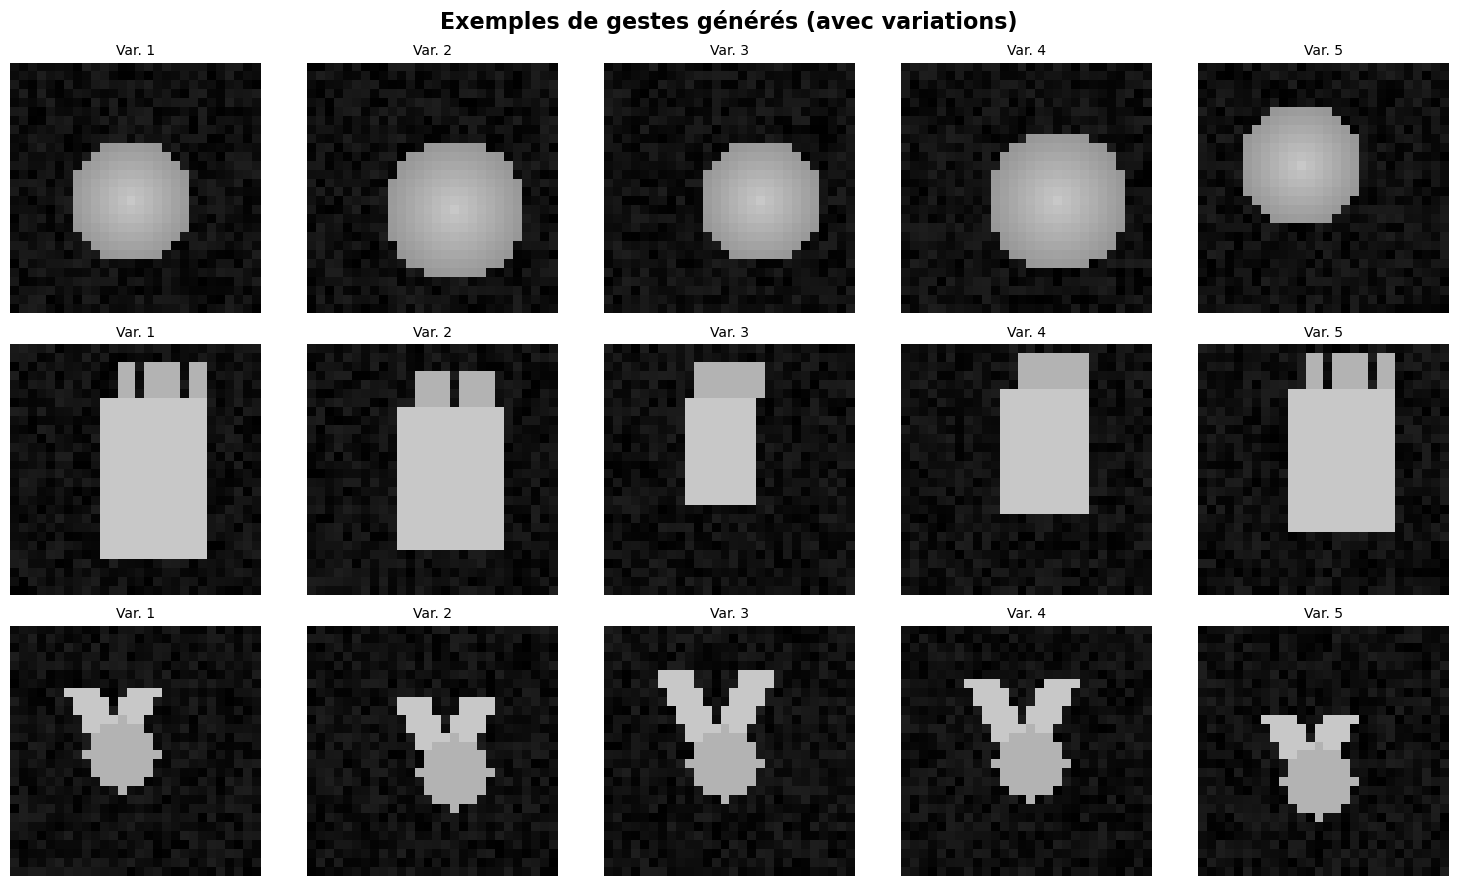

✅ Visualisation sauvegardée : results/plots/gestes_synthetiques_exemples.png


In [3]:
# =============================================================================
# VISUALISATION : Tester les 3 types de gestes
# =============================================================================

print("\n📊 Visualisation des 3 types de gestes avec variations\n")

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('Exemples de gestes générés (avec variations)', 
             fontsize=16, fontweight='bold')

noms_classes = {
    0: "Poing fermé",
    1: "Paume ouverte",
    2: "Victoire (V)"
}

for classe in range(3):
    for variation in range(5):
        image = generer_geste(classe, variation=True)
        
        axes[classe, variation].imshow(image, cmap='gray', vmin=0, vmax=255)
        
        if variation == 0:
            axes[classe, variation].set_ylabel(
                noms_classes[classe], 
                fontsize=12, 
                fontweight='bold'
            )
        
        axes[classe, variation].set_title(f'Var. {variation+1}', fontsize=10)
        axes[classe, variation].axis('off')

plt.tight_layout()
plt.savefig('results/plots/gestes_synthetiques_exemples.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualisation sauvegardée : results/plots/gestes_synthetiques_exemples.png")

In [4]:
# =============================================================================
# GÉNÉRATION DU DATASET COMPLET
# =============================================================================

# Paramètres du dataset
NOMBRE_TRAIN = 900      # 900 images d'entraînement (300 par classe)
NOMBRE_TEST = 300       # 300 images de test (100 par classe)
NOMBRE_CLASSES = 3      # 3 types de gestes
TAILLE_IMAGE = 28       # Images 28x28 pixels

print("="*70)
print("🏭 GÉNÉRATION DU DATASET COMPLET")
print("="*70)
print(f"\n📊 Configuration :")
print(f"   - Images d'entraînement : {NOMBRE_TRAIN} ({NOMBRE_TRAIN//NOMBRE_CLASSES} par classe)")
print(f"   - Images de test        : {NOMBRE_TEST} ({NOMBRE_TEST//NOMBRE_CLASSES} par classe)")
print(f"   - Nombre de classes     : {NOMBRE_CLASSES}")
print(f"   - Taille des images     : {TAILLE_IMAGE}x{TAILLE_IMAGE} pixels")
print(f"   - Pixels par image      : {TAILLE_IMAGE * TAILLE_IMAGE}")

# Initialiser les listes pour stocker les données
donnees_train = []
labels_train = []
donnees_test = []
labels_test = []

print(f"\n⏳ Génération en cours...\n")

# =========================================================================
# DATASET D'ENTRAÎNEMENT
# =========================================================================
print("📦 Dataset d'entraînement :")
for classe in range(NOMBRE_CLASSES):
    print(f"   Classe {classe} ({noms_classes[classe]})...", end=" ")
    
    for i in range(NOMBRE_TRAIN // NOMBRE_CLASSES):
        # Générer une image avec variations
        image = generer_geste(classe, taille=TAILLE_IMAGE, variation=True)
        
        # Aplatir l'image 28x28 en vecteur de 784 valeurs
        image_aplatie = image.flatten()
        
        # Stocker
        donnees_train.append(image_aplatie)
        labels_train.append(classe)
    
    print(f"✅ {NOMBRE_TRAIN // NOMBRE_CLASSES} images")

# =========================================================================
# DATASET DE TEST
# =========================================================================
print(f"\n📦 Dataset de test :")
for classe in range(NOMBRE_CLASSES):
    print(f"   Classe {classe} ({noms_classes[classe]})...", end=" ")
    
    for i in range(NOMBRE_TEST // NOMBRE_CLASSES):
        image = generer_geste(classe, taille=TAILLE_IMAGE, variation=True)
        image_aplatie = image.flatten()
        
        donnees_test.append(image_aplatie)
        labels_test.append(classe)
    
    print(f"✅ {NOMBRE_TEST // NOMBRE_CLASSES} images")

print(f"\n✅ Génération terminée !")
print(f"\n📊 Statistiques :")
print(f"   - Total images train : {len(donnees_train)}")
print(f"   - Total images test  : {len(donnees_test)}")
print(f"   - Total général      : {len(donnees_train) + len(donnees_test)}")

🏭 GÉNÉRATION DU DATASET COMPLET

📊 Configuration :
   - Images d'entraînement : 900 (300 par classe)
   - Images de test        : 300 (100 par classe)
   - Nombre de classes     : 3
   - Taille des images     : 28x28 pixels
   - Pixels par image      : 784

⏳ Génération en cours...

📦 Dataset d'entraînement :
   Classe 0 (Poing fermé)... ✅ 300 images
   Classe 1 (Paume ouverte)... ✅ 300 images
   Classe 2 (Victoire (V))... ✅ 300 images

📦 Dataset de test :
   Classe 0 (Poing fermé)... ✅ 100 images
   Classe 1 (Paume ouverte)... ✅ 100 images
   Classe 2 (Victoire (V))... ✅ 100 images

✅ Génération terminée !

📊 Statistiques :
   - Total images train : 900
   - Total images test  : 300
   - Total général      : 1200


In [5]:
# =============================================================================
# CRÉATION DES DATAFRAMES ET SAUVEGARDE EN CSV
# =============================================================================

print("\n" + "="*70)
print("💾 SAUVEGARDE DES DONNÉES")
print("="*70)

# Créer les DataFrames
# Structure : 1ère colonne = label, colonnes suivantes = pixels (0 à 783)
print("\n📋 Création des DataFrames...")

train_df = pd.DataFrame(donnees_train)
train_df.insert(0, 'label', labels_train)

test_df = pd.DataFrame(donnees_test)
test_df.insert(0, 'label', labels_test)

print(f"✅ DataFrame train : {train_df.shape}")
print(f"   → {train_df.shape[0]} lignes (images)")
print(f"   → {train_df.shape[1]} colonnes (1 label + {TAILLE_IMAGE*TAILLE_IMAGE} pixels)")

print(f"\n✅ DataFrame test : {test_df.shape}")
print(f"   → {test_df.shape[0]} lignes (images)")
print(f"   → {test_df.shape[1]} colonnes (1 label + {TAILLE_IMAGE*TAILLE_IMAGE} pixels)")

# Afficher un aperçu
print(f"\n👀 Aperçu du DataFrame train :")
print(train_df.head())

# Sauvegarder en CSV
chemin_train = 'data/raw/sign_mnist_train.csv'
chemin_test = 'data/raw/sign_mnist_test.csv'

print(f"\n💾 Sauvegarde des fichiers CSV...")
train_df.to_csv(chemin_train, index=False)
test_df.to_csv(chemin_test, index=False)

# Vérifier la sauvegarde
if os.path.exists(chemin_train) and os.path.exists(chemin_test):
    taille_train_kb = os.path.getsize(chemin_train) / 1024
    taille_test_kb = os.path.getsize(chemin_test) / 1024
    
    print(f"\n✅ Fichiers sauvegardés avec succès !")
    print(f"\n📄 {chemin_train}")
    print(f"   Taille : {taille_train_kb:.1f} KB")
    
    print(f"\n📄 {chemin_test}")
    print(f"   Taille : {taille_test_kb:.1f} KB")
    
    print(f"\n" + "="*70)
    print("🎉 GÉNÉRATION TERMINÉE AVEC SUCCÈS !")
    print("="*70)
    print(f"\n✅ Vous pouvez maintenant passer au notebook suivant :")
    print(f"   → 02_data_exploration.ipynb")
else:
    print("\n❌ ERREUR : Les fichiers n'ont pas été créés correctement")


💾 SAUVEGARDE DES DONNÉES

📋 Création des DataFrames...
✅ DataFrame train : (900, 785)
   → 900 lignes (images)
   → 785 colonnes (1 label + 784 pixels)

✅ DataFrame test : (300, 785)
   → 300 lignes (images)
   → 785 colonnes (1 label + 784 pixels)

👀 Aperçu du DataFrame train :
   label   0   1   2   3   4   5   6   7   8  ...  774  775  776  777  778  \
0      0  18  29   7   1   7  24  17   9  27  ...    5   23   16   29    6   
1      0  17  11   7  20   2   3  11   2  16  ...   27   27   16   10   14   
2      0   3  10   1  27  28  12  22   2  13  ...   16    9   24   22   18   
3      0  24  25  25  28  25  26  14   8   1  ...    0   20   25   28   26   
4      0  17  21  17  10   5   2  26  28  18  ...   17    6   10   17    6   

   779  780  781  782  783  
0    4    2   11    7   14  
1   24    4   16   11   12  
2    7    4   22   18    1  
3   26   15   27   13   27  
4   14   27   20    5    7  

[5 rows x 785 columns]

💾 Sauvegarde des fichiers CSV...

✅ Fichiers sauveg


📊 ANALYSE DE LA DISTRIBUTION DES CLASSES



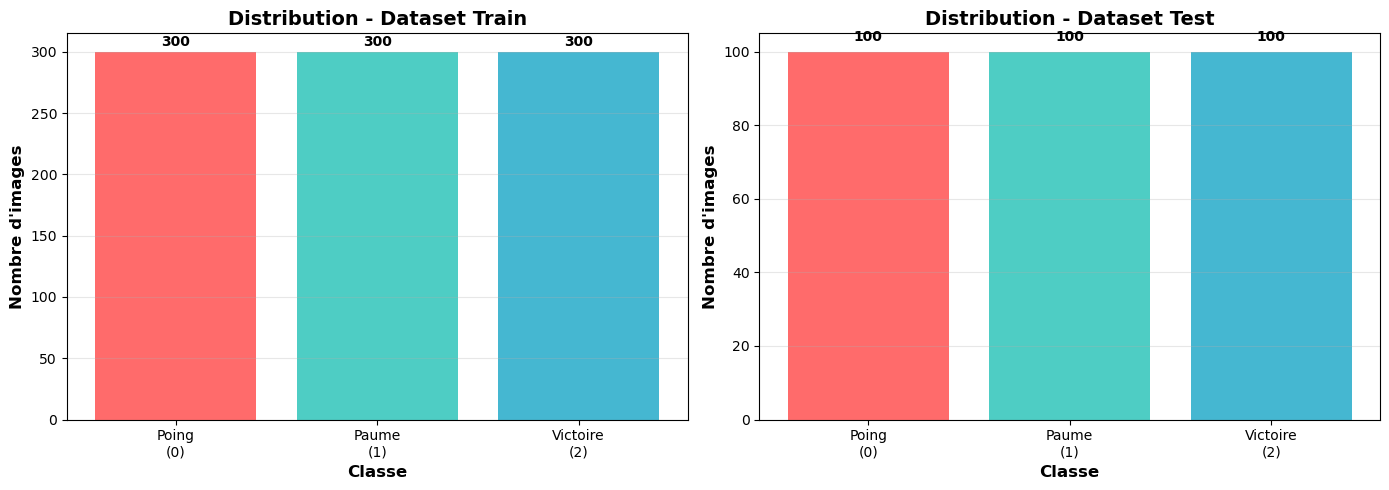

✅ Distribution sauvegardée : results/plots/distribution_classes.png

⚖️ Équilibre des classes :
   Train : {0: 300, 1: 300, 2: 300}
   Test  : {0: 100, 1: 100, 2: 100}

✅ Dataset équilibré (même nombre d'exemples par classe)


In [6]:
# =============================================================================
# VISUALISATION : Distribution des classes
# =============================================================================

print("\n📊 ANALYSE DE LA DISTRIBUTION DES CLASSES\n")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution train
train_counts = train_df['label'].value_counts().sort_index()
axes[0].bar(train_counts.index, train_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_xlabel('Classe', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Nombre d\'images', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution - Dataset Train', fontsize=14, fontweight='bold')
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['Poing\n(0)', 'Paume\n(1)', 'Victoire\n(2)'])
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(train_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Distribution test
test_counts = test_df['label'].value_counts().sort_index()
axes[1].bar(test_counts.index, test_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_xlabel('Classe', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Nombre d\'images', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution - Dataset Test', fontsize=14, fontweight='bold')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['Poing\n(0)', 'Paume\n(1)', 'Victoire\n(2)'])
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(test_counts.values):
    axes[1].text(i, v + 3, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('results/plots/distribution_classes.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Distribution sauvegardée : results/plots/distribution_classes.png")

# Vérifier l'équilibre
print(f"\n⚖️ Équilibre des classes :")
print(f"   Train : {train_counts.to_dict()}")
print(f"   Test  : {test_counts.to_dict()}")
print(f"\n✅ Dataset équilibré (même nombre d'exemples par classe)")

In [7]:
# Vérification finale
print("🔍 VÉRIFICATION FINALE\n")
print("="*70)

verif_ok = True

# 1. Fichiers CSV
for fichier in ['data/raw/sign_mnist_train.csv', 'data/raw/sign_mnist_test.csv']:
    if os.path.exists(fichier):
        print(f"✅ {fichier}")
    else:
        print(f"❌ {fichier} MANQUANT")
        verif_ok = False

# 2. Plots
for plot in ['results/plots/gestes_synthetiques_exemples.png', 
             'results/plots/distribution_classes.png']:
    if os.path.exists(plot):
        print(f"✅ {plot}")
    else:
        print(f"❌ {plot} MANQUANT")
        verif_ok = False

print("="*70)
if verif_ok:
    print("\n🎉 TOUT EST PRÊT ! Passez à l'ÉTAPE 6")
else:
    print("\n⚠️ Certains fichiers manquent. Réexécutez les cellules précédentes.")

🔍 VÉRIFICATION FINALE

✅ data/raw/sign_mnist_train.csv
✅ data/raw/sign_mnist_test.csv
✅ results/plots/gestes_synthetiques_exemples.png
✅ results/plots/distribution_classes.png

🎉 TOUT EST PRÊT ! Passez à l'ÉTAPE 6
